In [ ]:
multiplotter

error count for all uses cases (including unknown solution)

consistent try / submit semantic whether knows or unknown
know : number of wrong cells
unknown number of violated rules

track experiment ?

some refactoring

In [130]:
import numpy as np
from itertools import groupby

In [135]:
states = np.array([[1,0], [1,1]])
rows = states
blocks = [ [len(list(g)) for k,g in groupby(line) if k==1]
           for line in rows]
blocks

[[1], [2]]

In [138]:
puzzle2x2 = Puzzle(clues2x2)
puzzle2x2.norm_clues["rows"]

[[1], [2]]

In [141]:
list(zip(blocks, puzzle2x2.norm_clues["rows"]))

[([1], [1]), ([2], [2])]

In [148]:
[abs(sum(b)-sum(c)) for (b,c) in zip(blocks, puzzle2x2.norm_clues["rows"])]

[0, 0]

In [149]:
sum([abs(sum(b)-sum(c)) for (b,c) in zip(blocks, puzzle2x2.norm_clues["rows"])])

0

In [150]:
states = np.array([[1,1], [1,1]])
rows = states
blocks = [ [len(list(g)) for k,g in groupby(line) if k==1]
           for line in rows]
blocks

[[2], [2]]

In [151]:
sum([abs(sum(b)-sum(c)) for (b,c) in zip(blocks, puzzle2x2.norm_clues["rows"])])

1

In [153]:
puzzle5x5s = Puzzle(clues5x5s)
puzzle5x5s.norm_clues["rows"]

[[1], [3], [1, 1], [3], [5]]

In [154]:
rows = solution5x5s
blocks = [ [len(list(g)) for k,g in groupby(line) if k==1]
           for line in rows]
blocks

[[1], [3], [1, 1], [3], [5]]

In [155]:
sum([abs(sum(b)-sum(c)) for (b,c) in zip(blocks, puzzle5x5s.norm_clues["rows"])])

0

In [159]:
blocks = [[1], [3], [0, 1], [3], [5]]
sum([abs(sum(b)-sum(c)) for (b,c) in zip(blocks, puzzle5x5s.norm_clues["rows"])])

1

In [181]:
blocks = [[1], [3], [0, -1], [3], [5]]
sum([abs(sum(b)-sum(c)) for (b,c) in zip(blocks, puzzle5x5s.norm_clues["rows"])])

3

In [ ]:
TODO missing works more or less
bloxls count the number of blacks 
test for missing black

In [183]:
states = np.array([[-1,0], [1,1]])
rows = states
blocks = [ [len(list(g)) for k,g in groupby(line) if k==1]
           for line in rows]
blocks

[[], [2]]

In [185]:
sum([abs(sum(b)-sum(c)) for (b,c) in zip(blocks, puzzle2x2.norm_clues["rows"])])

1

In [195]:
states = np.array([[1,-1], [1,1]])
states = np.where(states == -1, 0, states)
states

array([[1, 0],
       [1, 1]])

In [196]:
import numpy as np
from itertools import groupby
from operator import mul

class NonoGameEngine:
    '''
    Provide utilities for this game
    '''
    
    def __init__(self, a_puzzle):
        '''
        Engine constructor
        '''
            
        self.puzzle = a_puzzle
        
        # init a board
        self.board = Board(a_puzzle)
        self.plotter = BoardPlotter(self.board)
        
        # init score
        self.errors = 0
        
        
    def show_board(self):
        ''' 
        Plot the board
        '''
        self.plotter.show()  
        
        
    def submit(self, states_list):
        ''' 
        Submit the solution and give all the cells's state in one action
        Check whether the states given a the registered solution (assumes it has been given)
        Returns the number of errors
        black missing are counted as errors - fillers are ignored
        '''
        #if apply: must aplly apply for computations
        self.board.fill_all(states_list, autofill=autofill)
        # board is okay if without errors on blacks
        return self.compute_errors()
           
        
    def is_solved(self):
        '''
        Check whether the puzzle is solved
        '''
        
        done = True
        if done:
            done = self.board.count_empty() == 0
        if done:
            done = self.compute_errors() == 0
        return done
    
    
    def compute_errors(self):
        '''
        Compute the difference between given board and clues
        '''
        
        # for rows
        board_rows = self.get_rows_blocks()
        clues_rows = self.puzzle.norm_clues["rows"]
        rows_errors = sum([abs(sum(b)-sum(c)) for (b,c) in zip(board_rows, clues_rows)])
        # for cols
        board_cols = self.get_cols_blocks()
        clues_cols = self.puzzle.norm_clues["cols"]
        cols_errors = sum([abs(sum(b)-sum(c)) for (b,c) in zip(board_cols, clues_cols)])
        return rows_errors + cols_errors

    
    def get_rows_blocks(self):
        '''
        Compute blocks for each rows
        '''
        
        rows = self.board.states
        blocks = [ [len(list(g)) for k,g in groupby(line) if k==1]
                   for line in rows]
        return blocks

    
    def get_cols_blocks(self):
        '''
        Compute blocks for each cols
        '''
        
        w = self.board.states.shape[0]
        h = self.board.states.shape[1]
        length = mul(w, h)
        cols = [ [self.board.states.reshape(length)[c+r*w]
                     for r in range(0, h)]
                 for c in range(0, w)]
        blocks = [ [len(list(g)) for k,g in groupby(line) if k==1]
                   for line in cols]
        return blocks    

    
    
class NonoWithSolutionGameEngine(NonoGameEngine):
    '''
    Provide utilities for this game. The solution is known beforehand.
    '''
    
    def __init__(self, a_puzzle, a_solution):
        '''
        Engine constructor
        '''
        soper().__init__(a_puzzle)
            
        self.solution = a_solution
        if a_solution:
            self.flat_solution = self.solution.reshape(self.puzzle.cells_count).tolist()
        else:
            self.flat_solution = None
        
        # init score
        self.errors = 0
        
        
    def play(self, row, col, mark, apply=True):
        ''' 
        Play the game by sending the state of one cell
        Check whether an action is valid given a solution 
        If apply, update the board
        '''
        okay = self.solution[row, col] == mark.value   
        if not okay:
            self.errors += 1
           
        if apply:
            # apply the real state which is what games usually do
            true_mark = BoardMark(self.solution[row, col])
            self.board.mark(row, col, true_mark)
        return okay    

    
    def submit(self, states_list, apply=True):
        ''' 
        Submit the solution and give all the cells's state in one action
        Check whether the states given a the registered solution (assumes it has been given)
        '''
        # compute the difference between given board and known solution
        self.errors = sum([abs(p-e) for (p,e) in zip(states_list, self.flat_solution) if p>=0])
        if apply:
            self.board.fill_all(states_list)
        # board is okay when full and without errors
        return  states_list == self.flat_solution # must account for empty 
    


In [ ]:
TODO compute errors and missing on states ? 
cost of updatibg the board

In [173]:
puzzle2x2 = Puzzle(clues2x2)

In [191]:
game2x2 = NonoGameEngine(puzzle2x2)
score = game2x2.submit(solution2x2, apply=True)
score

0

In [175]:
game2x2.compute_errors()

0

In [177]:
game2x2.board.count_empty()

0

In [193]:
puzzle5x5s = Puzzle(clues5x5s)
game5x5s = NonoGameEngine(puzzle5x5s)
score = game5x5s.submit(solution5x5s, apply=True)
score

0

In [9]:
from episode04 import clues2x2, clues5x5s, solution2x2, solution5x5s
from episode04 import Puzzle, BoardMark

import numpy as np

In [7]:
from episode04 import Board, BoardMark, BoardPlotter

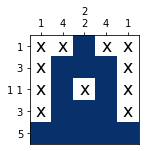

error_count:11


In [16]:
# create the game engine
puzzle5x5s = Puzzle(clues5x5s)
game5x5s = GameEngine(puzzle5x5s, solution5x5s)

for row in range(puzzle5x5s.height):
    for col in range(puzzle5x5s.width):
        game5x5s.play(row, col, BoardMark.BLACK)

game5x5s.show_board()
print(f"error_count:{game5x5s.errors}")
assert game5x5s.errors == 11 

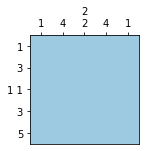

error_count:1


In [17]:
# create the game engine
puzzle5x5s = Puzzle(clues5x5s)
game5x5s = GameEngine(puzzle5x5s, solution5x5s)

okay = game5x5s.play(0, 0, BoardMark.BLACK, apply=False)
assert not okay 

game5x5s.show_board()
print(f"error_count:{game5x5s.errors}")
assert game5x5s.errors == 1 

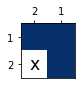

error_count:2


In [24]:
# create the game engine
puzzle2x2 = Puzzle(clues2x2)
game2x2 = GameEngine(puzzle2x2, solution2x2)

okay = game2x2.submit([1, 1, 0, 1])
assert not okay 

game2x2.show_board()
print(f"error_count:{game2x2.errors}")
assert game2x2.errors == 2

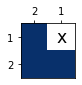

error_count:0


In [25]:
# create the game engine
puzzle2x2 = Puzzle(clues2x2)
game2x2 = GameEngine(puzzle2x2, solution2x2)

okay = game2x2.submit([1, 0, 1, 1])
assert okay 

game2x2.show_board()
print(f"error_count:{game2x2.errors}")
assert game2x2.errors == 0

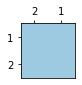

In [26]:
# create the game engine
puzzle2x2 = Puzzle(clues2x2)
game2x2 = GameEngine(puzzle2x2, solution2x2)

okay = game2x2.submit([1, 1, 0, 1], apply=False)
assert not okay 
game2x2.show_board()
assert game2x2.errors == 2 

# TODO sans solution ?